# Cost Function for Linear Regression with one variable

In this notebook we'll explore the cost function associated with a univariate linear regression model.

In [19]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./custom_styles.mplstyle')

## Data

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |

In [20]:
# Load the data numpy arrays
x_train = np.array([1.0, 2.0])       #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])   #(price in 1000s of dollars)

## Computing the Cost Function

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction. We square here to remove negative numbers from the cost.  
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [21]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, with m examples.
      y (ndarray (m,)): target values/actual training outouts we need to measure against.
      w,b (scalar)    : model parameters.  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
        to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

Our goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized.

In the previous lab, you determined that $b=100$ provided an optimal solution so let's set $b$ to 100 and focus on $w$.

Below, use the slider control to select the value of $w$ that minimizes cost. It can take a few seconds for the plot to update.

In [24]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

The plot contains a few points that are worth mentioning.
- cost is minimized when $w = 200$, which matches results from the previous lab
- Because the difference between the target and pediction is squared in the cost equation, the cost increases rapidly when $w$ is either too large or too small.
- Using the `w` and `b` selected by minimizing cost results in a line which is a perfect fit to the data.

## Cost Function Visualization- 3D

We can see how cost varies with respect to *both* `w` and `b` by plotting in 3D or using a contour plot. 

### Larger Data Set
It is instructive to view a scenario with a few more data points. This data set includes data points that do not fall on the same line. What does that mean for the cost equation? Can we find $w$, and $b$ that will give us a cost of 0? 

In the contour plot, click on a point to select `w` and `b` to achieve the lowest cost. Use the contours to guide your selections. Note, it can take a few seconds to update the gra

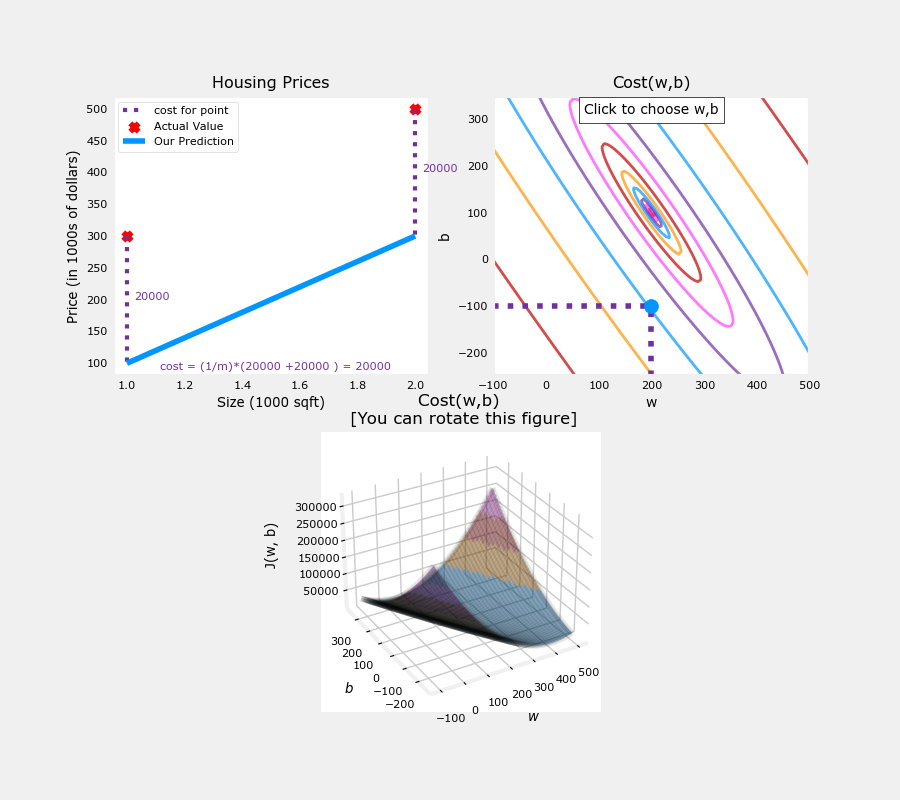

No such comm: 9684d0cfb95f49be871ec8e1e2e2c67a


In [23]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)